In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
full = pd.concat([train, test], ignore_index=True)
full.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,ID
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,NaN
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,NaN
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,NaN
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,NaN
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,NaN


In [ ]:
full.shape

(38185, 11)

In [ ]:
full.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color',
       'ID'],
      dtype='object')

In [ ]:
full.isna().sum()

AnimalID          11456
Name              10916
DateTime              0
OutcomeType       11456
OutcomeSubtype    25068
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       24
Breed                 0
Color                 0
ID                26729
dtype: int64

In [ ]:
from collections import Counter
Counter(train['OutcomeType'])

Counter({'Adoption': 10769,
         'Died': 197,
         'Euthanasia': 1555,
         'Return_to_owner': 4786,
         'Transfer': 9422})

In [ ]:
full = full.drop(columns = ['OutcomeSubtype', 'AnimalID', 'Name', 'DateTime', 'Color'])
Y = full['OutcomeType']

In [ ]:
full.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,ID
0,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,NaN
1,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,NaN
2,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,NaN
3,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,NaN
4,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,NaN


In [ ]:
full.drop(full.columns[len(full.columns)-1], axis=1, inplace=True)
full.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix
1,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix
2,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix
3,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix
4,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle


In [ ]:
full.isna().sum()

OutcomeType       11456
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       24
Breed                 0
dtype: int64

In [ ]:
full = full[full['SexuponOutcome'].notna()]
full = full[full['AgeuponOutcome'].notna()]
full.isna().sum()

OutcomeType       11450
AnimalType            0
SexuponOutcome        0
AgeuponOutcome        0
Breed                 0
dtype: int64

In [ ]:
# full.AgeuponOutcome.str.extract('(\d+)')
for i in full.index:
  string = str(full.at[i, 'AgeuponOutcome'])
  string_list = string.split(' ')
  num, text = string_list
  if text=='months' or text=='month':
    num = int(num) * 30
  elif text=='weeks' or text=='week':
    num = int(num) * 7
  elif text=='years' or text=='year':
    num = int(num) * 365
  elif text=='days' or text=='day':
    num = int(num)
      
  full.at[i, 'AgeuponOutcome'] = num

In [ ]:
full.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,Return_to_owner,Dog,Neutered Male,365,Shetland Sheepdog Mix
1,Euthanasia,Cat,Spayed Female,365,Domestic Shorthair Mix
2,Adoption,Dog,Neutered Male,730,Pit Bull Mix
3,Transfer,Cat,Intact Male,21,Domestic Shorthair Mix
4,Transfer,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle


In [ ]:
categorical_columns = ['AnimalType', 'SexuponOutcome', 'Breed']
numerical_columns = ['AgeuponOutcome']
outputs = ['OutcomeType']

In [ ]:
full.dtypes

OutcomeType       object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
dtype: object

In [ ]:
for category in categorical_columns:
    full[category] = full[category].astype('category')

In [ ]:
full.dtypes

OutcomeType         object
AnimalType        category
SexuponOutcome    category
AgeuponOutcome      object
Breed             category
dtype: object

In [ ]:
for num_col in numerical_columns:
    full[num_col] = full[num_col].astype('int64')

In [ ]:
full.dtypes

OutcomeType         object
AnimalType        category
SexuponOutcome    category
AgeuponOutcome       int64
Breed             category
dtype: object

In [ ]:
train_X = full[:26710]
test_X = full[26710:]
del test_X['OutcomeType']
print(train_X.shape)
print(test_X.shape)

(26710, 5)
(11450, 4)


In [ ]:
test_X.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
26729,Dog,Intact Female,300,Labrador Retriever Mix
26730,Dog,Spayed Female,730,German Shepherd/Siberian Husky
26731,Cat,Neutered Male,365,Domestic Shorthair Mix
26732,Dog,Intact Male,120,Collie Smooth Mix
26733,Dog,Neutered Male,730,Miniature Poodle Mix


In [ ]:
from sklearn.preprocessing import LabelEncoder
print(Counter(train_X['OutcomeType']))
train_X['OutcomeType'] = LabelEncoder().fit_transform(train_X['OutcomeType'])
print(Counter(train_X['OutcomeType']))

target_dict = {
    'Return_to_owner' : 3,
    'Euthanasia': 2,
    'Adoption': 0,
    'Transfer': 4,
    'Died': 1
}

Counter({'Adoption': 10769, 'Transfer': 9406, 'Return_to_owner': 4785, 'Euthanasia': 1553, 'Died': 197})
Counter({0: 10769, 4: 9406, 3: 4785, 2: 1553, 1: 197})


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train_X.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,3,Dog,Neutered Male,365,Shetland Sheepdog Mix
1,2,Cat,Spayed Female,365,Domestic Shorthair Mix
2,0,Dog,Neutered Male,730,Pit Bull Mix
3,4,Cat,Intact Male,21,Domestic Shorthair Mix
4,4,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle


In [ ]:
train_X.dtypes

OutcomeType          int64
AnimalType        category
SexuponOutcome    category
AgeuponOutcome       int64
Breed             category
dtype: object

Embedding train data

In [ ]:
atype = train_X['AnimalType'].cat.codes.values
sex = train_X['SexuponOutcome'].cat.codes.values
brd = train_X['Breed'].cat.codes.values

categorical_data = np.stack([atype, sex, brd], 1)

categorical_data[:10]

array([[   1,    2, 1482],
       [   0,    3,  775],
       [   1,    2, 1293],
       [   0,    1,  775],
       [   1,    2, 1101],
       [   1,    0,  455],
       [   0,    1,  775],
       [   0,    4,  775],
       [   1,    3,   54],
       [   1,    3,  449]], dtype=int16)

In [ ]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[   1,    2, 1482],
        [   0,    3,  775],
        [   1,    2, 1293],
        [   0,    1,  775],
        [   1,    2, 1101],
        [   1,    0,  455],
        [   0,    1,  775],
        [   0,    4,  775],
        [   1,    3,   54],
        [   1,    3,  449]])

In [ ]:
numerical_data = np.stack([train_X[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:5]

tensor([[365.],
        [365.],
        [730.],
        [ 21.],
        [730.]])

In [ ]:
outputs = torch.tensor(train_X[outputs].values).flatten()
outputs[:5]

tensor([3, 2, 0, 4, 4])

In [ ]:
print(categorical_data.shape)
print(numerical_data.shape)
print(outputs.shape)

torch.Size([26710, 3])
torch.Size([26710, 1])
torch.Size([26710])


In [ ]:
categorical_column_sizes = [len(train_X[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(2, 1), (5, 3), (1678, 50)]


In [ ]:
total_records = 26710
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [ ]:
print(len(categorical_train_data))
print(len(numerical_train_data))
print(len(train_outputs))

print(len(categorical_test_data))
print(len(numerical_test_data))
print(len(test_outputs))

21368
21368
21368
5342
5342
5342


In [ ]:
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

Training the model

In [ ]:
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 5, [150,100,50], p=0.1)

In [ ]:
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(5, 3)
    (2): Embedding(1678, 50)
  )
  (embedding_dropout): Dropout(p=0.1, inplace=False)
  (batch_norm_num): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=55, out_features=150, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=150, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.1, inplace=False)
    (12): Linear(in_features=50, out_features=

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 400
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.84332550
epoch:  26 loss: 0.94308126
epoch:  51 loss: 0.87114733
epoch:  76 loss: 0.83236122
epoch: 101 loss: 0.80363983
epoch: 126 loss: 0.78518760
epoch: 151 loss: 0.77168649
epoch: 176 loss: 0.75828540
epoch: 201 loss: 0.75258219
epoch: 226 loss: 0.74367225
epoch: 251 loss: 0.73949772
epoch: 276 loss: 0.73170775
epoch: 301 loss: 0.72580361
epoch: 326 loss: 0.72136903
epoch: 351 loss: 0.71579427
epoch: 376 loss: 0.71514493
epoch: 400 loss: 0.7091012001


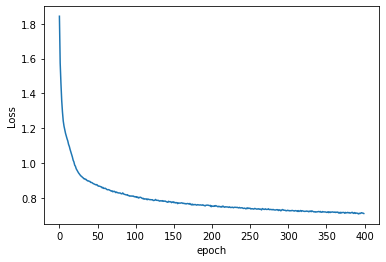

In [ ]:
plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

Make predictions

In [ ]:
with torch.no_grad():
    y_val = model(categorical_test_data, numerical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 1.23703218


In [ ]:
print(y_val[:5])

tensor([[-5.8817,  2.2389,  0.1874,  2.1495,  2.9032],
        [-6.5650, -3.4934, -5.2972, 11.2893, -0.5302],
        [ 4.0778, -5.2382, -4.8634,  6.5010, -1.1675],
        [ 1.9700, -4.4213, -1.5168,  1.0901,  1.4338],
        [-2.4107, -8.9351,  3.7063,  3.7843,  1.5334]])


In [ ]:
y_val = np.argmax(y_val, axis=1)

In [ ]:
print(y_val[:5])

tensor([4, 3, 3, 0, 3])


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[1659    1   19  234  222]
 [   7    1    0    1   30]
 [  63    0   31   77  153]
 [ 382    1   32  390  168]
 [ 457    0   26  172 1216]]
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      2135
           1       0.33      0.03      0.05        39
           2       0.29      0.10      0.14       324
           3       0.45      0.40      0.42       973
           4       0.68      0.65      0.66      1871

    accuracy                           0.62      5342
   macro avg       0.48      0.39      0.40      5342
weighted avg       0.60      0.62      0.60      5342

0.6171845750655185
